In [17]:
library(forecast)

Carga los datos

In [18]:
datos<-read.table("Precios_1995.csv",sep=",",header = TRUE,stringsAsFactors=FALSE) #cargo la serie de datos

current_price<-datos$Promedio_Aritmetico_...kWh._Corriente 
current_price<-ts(current_price,frequency = 7,start=c(1,4)) #construyo la serie corriente // start=c(num_semana,num_dia)


constant_price<-datos$X..KWh_Const_Dic_2008
constant_price<-ts(constant_price,frequency = 7,start=c(1,4)) #construyo la serie constante // start=c(num_semana,num_dia)


Construyo un vector con las fechas de los precios

In [19]:
b<-strsplit(datos$Fecha,split = "/")

In [20]:
date<-c()#construyo un vector para almacenar las fechas
for(i in seq(1:length(datos$Fecha))){
    
    date<-c(date,paste(b[[i]][3],b[[i]][2],b[[i]][1],sep = "-")) #Lleno elvector en el orden YYYY-mm-dd

}
datos<-cbind(date,datos) #Uno el resultado a mi dataframe de datos

Identifico el total de semanas existentes en la serie para comenzar a definir las ventanas de ajuste y pronostico

In [23]:
last_year<-as.Date(datos$date[7622])  #Doy formato de fecha al ultimo dato
last_year<-as.numeric(format(last_year,"%Y")) #extraer el año del ultimo dato

leap_years<-length(seq(from = 1996,to = last_year,by = 4)) #Total dias bisiestos de la serie

total_weeks<-round(length(constant_price+leap_years)/7,digits = 0)+1 #Totalde semanas, sabiendo que la serie empieza un miercoles

Selecciono la primera ventana de ajuste y su tamaño, asimismo selecciono la ventana de pronostico


In [232]:
from<-4
to<-52
all_models<-c()
print_res<-c()
Samples<-seq(from = total_weeks-1,to = 1,by = -52)
Semanas_for<-from:to
parametros_modelos<-list()
all_results<-c()
best_for<-10000000000000
week_best_for<-c()
for(i in seq(from =  1088,to = 1089)){
#for(semana in Semanas_for){
    #for (i in Samples){
        #if(i<to){ break}
    #for(i in seq(from =  1089,to = 1089)){
    for(semana in Semanas_for){
        
        y.fit<-window(constant_price,start=c(i-semana),end=c(i))
        y.for<-window(constant_price,start=c(i),end=c(i+1))
        
        
        
        modelo<-auto.arima(y.fit,stepwise = FALSE,approximation = FALSE)
        resultados<-c(accuracy(forecast(modelo,h = 8),y.for)[,2]["Test set"],training=semana)
        all_results<-c(all_results,resultados[[1]])
        all_models<-append(all_models,list(arimaorder(modelo)))
        
        if(resultados[[1]]<best_for){
            best_for<-resultados[[1]]
            week_best_for<-resultados[[2]]
        }
        
        #print(c(paste("para la semana ", i),paste("la mejor muestra es con la semana",week_best_for),best_for,arimaorder(modelo)))
    }
    print_res<-append(print_res,c(paste("para la semana ", i),paste("la mejor muestra es con la semana",week_best_for),
                best_for,arimaorder(modelo)))
    
}


In [233]:
print_res

[1] "para la semana  1088"                
 [2] "la mejor muestra es con la semana 13"
 [3] "8.28374975136405"                    
 [4] "2"                                   
 [5] "1"                                   
 [6] "0"                                   
 [7] "para la semana  1089"                
 [8] "la mejor muestra es con la semana 14"
 [9] "6.7338774665198"                     
[10] "2"                                   
[11] "1"                                   
[12] "0"                                   
[13] "1"                                   
[14] "0"                                   
[15] "0"                                   
[16] "7"

[1] 1
[1] 1 1


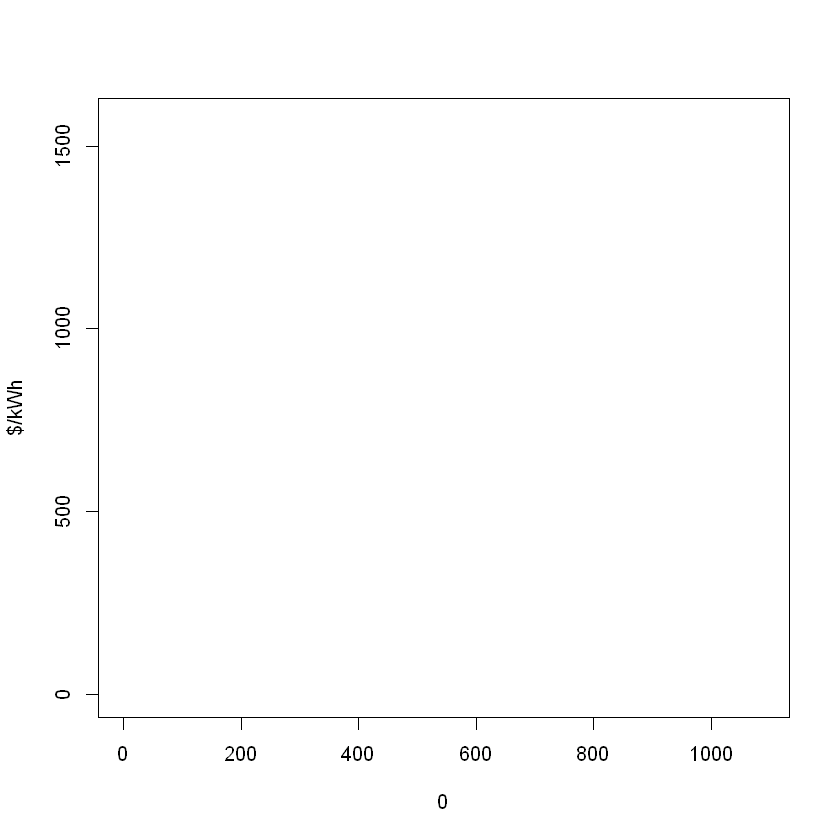

In [214]:
plot(x=0,y=0,type="l",ylim=c(0,max(constant_price)),xlim=c(0,total_weeks),ylab="$/kWh")
color<-c("red","blue","green","brown")

Samples<-seq(from = total_weeks-1,to = 1,by = -52)

print(1)
print(c(1,))

In [117]:
best_for
week

res<-c(as.numeric(best_for),week)

Test set 
6.733877

[1] 13

In [149]:
a<-c()
#a<-list(a,(arimaorder(modelo)))
a<-append(a,list(arimaorder(modelo)))
a<-append(a,list(arimaorder(modelo)))
a

[[1]]
[1] 0 1 0 0 0 1 7

[[2]]
[1] 0 1 0 0 0 1 7

In [174]:
head(seq(from = total_weeks, to =1,by=-51))
total_weeks

[1] 1090 1039  988  937  886  835

[1] 1090

[Cómo funciona auto.arima()](https://www.otexts.org/fpp/8/7)

In [383]:
mod1<-auto.arima(y.fit,max.order = 15,stepwise = FALSE,approximation = FALSE,max.d = 2,max.D = 2)
arimaorder(mod1)

[1] 4 0 2

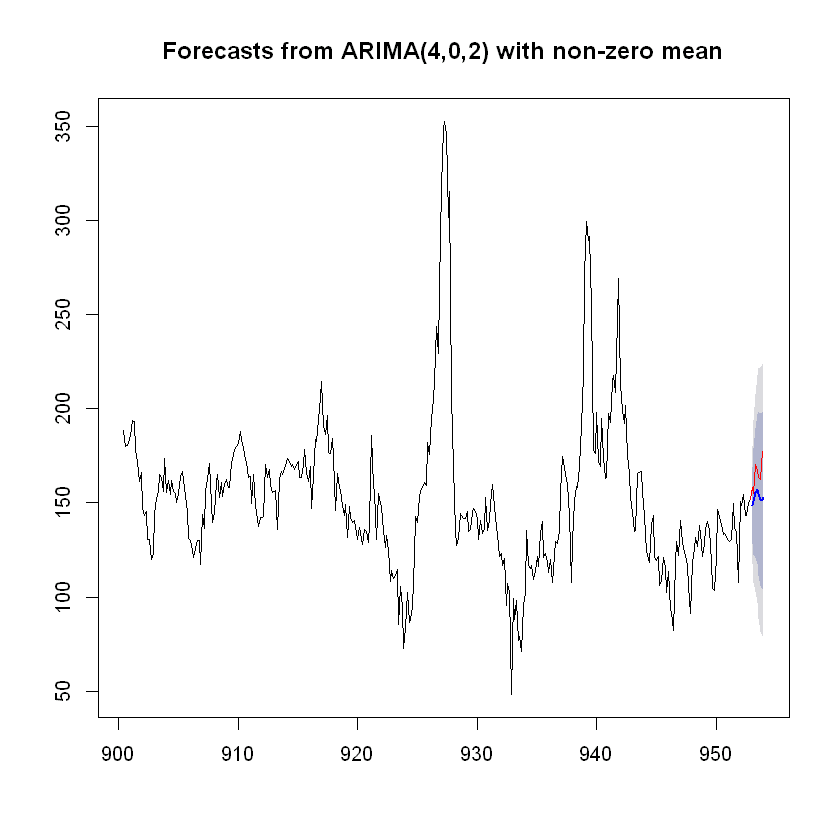

In [384]:
plot(forecast(mod1,h = 8))
lines(y.for,col="red")

In [385]:
forecast(mod1,h = 8)
y.for

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
953.0000       148.7461 128.4191 169.0731 117.65862 179.8336
953.1429       150.7689 122.6352 178.9027 107.74202 193.7959
953.2857       155.4328 121.2297 189.6359 103.12372 207.7420
953.4286       157.3739 117.8283 196.9195  96.89410 217.8537
953.5714       155.1624 111.6614 198.6634  88.63333 221.6914
953.7143       151.9321 106.0755 197.7887  81.80046 222.0637
953.8571       151.1489 103.9176 198.3801  78.91495 223.3828
954.0000       152.9975 104.7008 201.2943  79.13405 226.8610

Time Series:
Start = c(952, 7) 
End = c(953, 7) 
Frequency = 7 
[1] 151.992 158.294 155.109 170.688 167.312 163.684 162.235 177.204